Download the data

In [1]:
import pandas as pd
import numpy as np

url = (r'C:\Users\prosp\OneDrive\Documents\UL\Fall 2022\INFX598-001-202320 Machine Learning Applications\Exam\pvt_data.xlsx')
df = pd.read_excel(url)

Take a Quick look at the Data Structure

In [2]:
# let's check the first five rows
df.head()

,Bubble_Pt_ Pressure,Reservoir_Temp,Oil_Gravity,Gas_Gravity,Solution_GOR
0,325.0,180.00000,37.00000,0.945000,147.000000
1,399.0,197.00000,33.50000,0.702000,151.000000
2,500.0,230.00000,37.80000,0.985406,205.758904
3,500.0,226.14540,37.82721,0.983570,181.635267
4,500.0,189.45085,37.00000,0.939086,169.535905


In [3]:
# let's see a quick description of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bubble_Pt_ Pressure  600 non-null    float64
 1   Reservoir_Temp       600 non-null    float64
 2   Oil_Gravity          600 non-null    float64
 3   Gas_Gravity          600 non-null    float64
 4   Solution_GOR         600 non-null    float64
dtypes: float64(5)
memory usage: 23.6 KB


In [4]:
#summary of the numerical attributes
df.describe()

,Bubble_Pt_ Pressure,Reservoir_Temp,Oil_Gravity,Gas_Gravity,Solution_GOR
count,600.000000,600.000000,600.000000,600.000000,600.000000
mean,2523.301877,206.139879,36.639109,0.777985,704.081630
std,1034.672416,31.243998,3.752896,0.109616,398.799882
min,325.000000,38.000000,20.700000,0.569900,102.000000
25%,2000.000000,189.338138,34.800000,0.708000,423.267765
50%,2506.000000,202.000000,37.800000,0.750000,585.000000
75%,3000.000000,217.837200,38.500000,0.838251,921.500000
max,6100.000000,280.957478,52.800000,1.444000,2300.000000


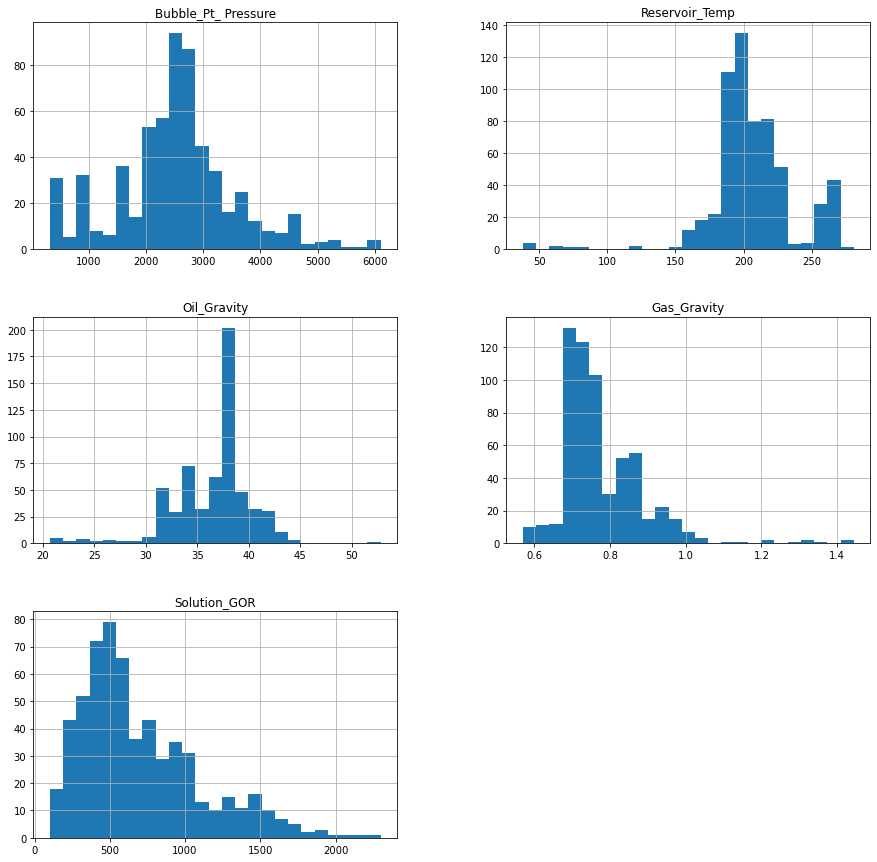

In [5]:
import matplotlib.pyplot as plt
df.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
# Create the test set

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [7]:
# categorize the dataset based on Bubble_Pt_Pressure into stratefied sampling
import pandas as pd

df['Bub_pt_cat'] = pd.cut(df['Bubble_Pt_ Pressure'],
                         bins=[0., 1000, 2000, 3000, 4000, np.inf],
                         labels=[1,2,3,4,5])

<AxesSubplot:>

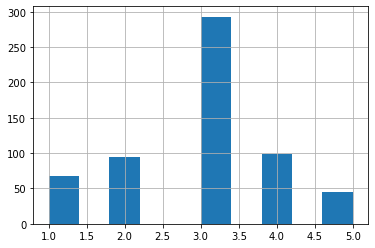

In [8]:
df['Bub_pt_cat'].hist()

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Bub_pt_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [10]:
strat_test_set['Bub_pt_cat'].value_counts()/len(strat_test_set)

3    0.483333
4    0.166667
2    0.158333
1    0.116667
5    0.075000
Name: Bub_pt_cat, dtype: float64

In [11]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Bub_pt_cat', axis=1, inplace=True)

Discover and Visualize the Dataset to gain Insight

In [12]:
# get a copy of the training dataset
df = strat_train_set.copy()

<AxesSubplot:xlabel='Bubble_Pt_ Pressure', ylabel='Solution_GOR'>

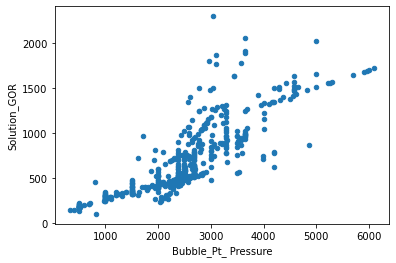

In [13]:
# Visualizing one of the input features against the output feature 

df.plot(kind='scatter', x='Bubble_Pt_ Pressure', y='Solution_GOR')

In [14]:
# Looking for correlations 

corr_matrix = df.corr()

In [15]:
corr_matrix['Solution_GOR'].sort_values(ascending=False)

Solution_GOR           1.000000
Bubble_Pt_ Pressure    0.822713
Oil_Gravity            0.471784
Reservoir_Temp         0.307916
Gas_Gravity            0.161980
Name: Solution_GOR, dtype: float64

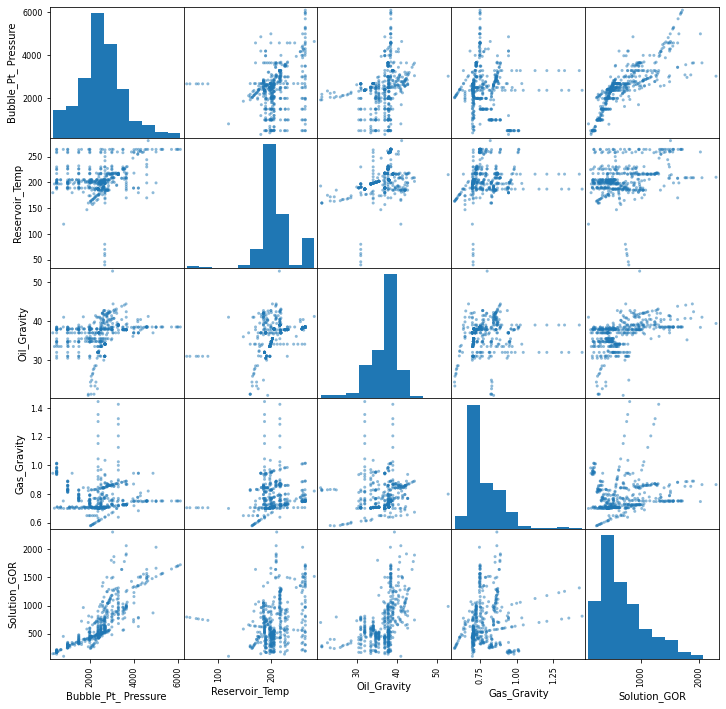

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(12,12))
plt.show()

Prepare the Data for Machine Learning Algorithms

In [17]:
df = strat_train_set.drop('Solution_GOR', axis=1)
df_labels = strat_train_set['Solution_GOR'].copy()

Select and Train a Model

Training and Evaluating on the Training Set

In [18]:
# Train the dataset using a simple linear regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df, df_labels)

LinearRegression()

In [19]:
# checking few datasets to see how the model performed

some_data = df.iloc[:5]
some_data_labels = df_labels.iloc[:5]
print('Predictions:', lin_reg.predict(some_data))
print('Labels:', list(some_data_labels))

Predictions: [641.82846495 228.65838709 345.54781471 556.06368778 258.33502055]
Labels: [516.0, 309.6498659260124, 348.94810220833944, 439.9172387246412, 176.43744922134385]


In [20]:
# Calculate the RMSE for the linear regression model

from sklearn.metrics import mean_squared_error
df_predictions = lin_reg.predict(df)
lin_mse = mean_squared_error(df_labels, df_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

190.57681085057087

In [59]:
from sklearn.metrics import r2_score

r2_score(df_labels, df_predictions)

0.7785588724483232

In [21]:
# let's train using a DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df, df_labels)

DecisionTreeRegressor()

In [22]:
# Calculate the RMSE for the linear regression model

df_predictions_tree_reg = tree_reg.predict(df)
tree_mse = mean_squared_error(df_labels, df_predictions_tree_reg)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

20.400291051845315

Better Evaluation Using Cross Validation

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

X_scaled = X_pipeline.fit_transform(df)

In [23]:
# Apply cross validation to the Decision Tree model

from sklearn. model_selection import cross_val_score

scores = cross_val_score(tree_reg, df, df_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [24]:
def display_scores(scores):
    print('Scores:', scores)
    print('Score mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [25]:
display_scores(tree_rmse_scores)

Scores: [ 66.87442375 152.00445989  94.7211542  117.53555952 168.57381215
 116.77136817 195.46407479 111.29300278 138.98763154 130.46221733]
Score mean: 129.2687704116845
Standard deviation: 34.99009943520413


In [26]:
# Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor

rnd_reg = RandomForestRegressor()
rnd_reg.fit(df, df_labels)

RandomForestRegressor()

In [27]:
rnd_scores = cross_val_score(rnd_reg, df, df_labels, scoring='neg_mean_squared_error', cv=10)
rnd_rmse_scores = np.sqrt(-rnd_scores)

In [28]:
display_scores(rnd_rmse_scores)

Scores: [ 83.1448964  105.79743445 103.60671948  94.0050047  108.73468435
 108.30671039 112.63680944 118.11040192 156.73561995 143.82878497]
Score mean: 113.49070660301459
Standard deviation: 20.78346995160706


In [29]:
# Linear Regression with Cross Validation

lin_scores = cross_val_score(lin_reg, df, df_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [30]:
display_scores(lin_rmse_scores)

Scores: [138.57700808 165.57722475 179.14819748 242.43464599 191.43297735
 156.71188816 176.44829668 194.70735453 266.93189952 184.32288866]
Score mean: 189.62923811933862
Standard deviation: 36.569497595650866


In [48]:
# Implementing SVM model

from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(X_scaled, df_labels)

SVR()

In [49]:
svm_scores = cross_val_score(svm_reg, df, df_labels, scoring='neg_mean_squared_error', cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)

In [50]:
display_scores(svm_rmse_scores)

Scores: [419.28658614 367.18436469 393.40861992 408.32583541 397.20940333
 248.13129379 352.74614268 404.42711619 503.68914821 379.11229609]
Score mean: 387.3520806461432
Standard deviation: 60.393757033481336


Fine-Tune your Model

Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]

grid_search = GridSearchCV(rnd_reg, param_grid=param_grid, 
                          cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_scaled, df_labels)

C:\Users\prosp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prosp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prosp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\prosp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\prosp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\prosp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\prosp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\prosp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prosp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\prosp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\prosp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\prosp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\prosp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-22560.09149653 -13563.30059085 -15230.05877802 -17874.82286578
 -14096.83633482 -14165.96421179             nan             nan
             nan             nan             nan             nan
 -17313.36048296 -15984.93773027 -18461.10386546 -18041.49977336
 -21504.49903948 -19657.95983494]
  warnings.warn(
C:\Users\prosp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [-5693.76945351 -2743.04852378 -2312.11184771 -4881.73212014
 -3034.1641431  -2530.08150418            nan            nan
            nan            nan            nan            nan
  -390.13032407  -390.13020833  -390.13032407  -390.13020833
  -390.13020833  -390.13020833]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 10}

In [44]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=10)

In [45]:
grid_scores = np.sqrt(-grid_search.best_score_)

In [46]:
grid_scores

116.46158418486414

Randomized Search

In [52]:
# Using RandomizedSearchCV 

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal


# defining hyperparamters
param_distributions = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(1000,1500),
        'gamma': expon(scale=1.0),
    }

ran = RandomizedSearchCV(svm_reg, param_distributions, cv=5, 
                    n_iter=10, scoring='neg_mean_squared_error',
                   return_train_score=True, random_state=42)

ran.fit(X_scaled, df_labels)

ran_mse = ran.best_score_
ran_rmse = np.sqrt(-ran_mse)
ran_rmse

145.6660599653422

Ensemble Methods

Analyze the Best Models and Their Errors

In [55]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([0.52156744, 0.13262294, 0.26116188, 0.08464774])

In [56]:
# Attribute scores next to the attribute name

sorted(zip(feature_importance, list(df)), reverse=True)

[(0.5215674359601724, 'Bubble_Pt_ Pressure'),
 (0.261161882400065, 'Oil_Gravity'),
 (0.13262294227489402, 'Reservoir_Temp'),
 (0.08464773936486855, 'Gas_Gravity')]

Evaluate your System on the Test Set

In [76]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('Solution_GOR', axis=1)
y_test = strat_test_set['Solution_GOR'].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [77]:
final_rmse

120.62115688953824